<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/nebula_M42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nebula M42 (Orion)**

The [Orion Nebula](https://en.wikipedia.org/wiki/Orion_Nebula) (also known as Messier 42, M42, or NGC 1976) is a diffuse nebula situated in the Milky Way, being south of Orion's Belt in the constellation of Orion,

![sciences](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg/1024px-Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg)

In [ ]:
!pip install astropy astroquery -q
from astroquery.ipac.irsa import Irsa
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.simbad import Simbad
from astropy import coordinates
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
import matplotlib.pyplot as plt
%matplotlib inline

*Load data with FITS via SDSS*

In [ ]:
from astroquery.simbad import Simbad

# Query SIMBAD for information about the Orion Nebula
result_table = Simbad.query_object('M42')

# Print the results
print(result_table)

MAIN_ID     RA        DEC    RA_PREC ... COO_WAVELENGTH     COO_BIBCODE     SCRIPT_NUMBER_ID
         "h:m:s"    "d:m:s"          ...                                                    
------- ---------- --------- ------- ... -------------- ------------------- ----------------
  M  42 05 35 16.8 -05 23 15       5 ...              X 2022A&A...661A..38P                1


In [ ]:
# Get skycoordinates of desired object
galaxy = Simbad.query_object('M42')
ra_hms = galaxy['RA'][0]
dec_dms = galaxy['DEC'][0]
print(galaxy)

MAIN_ID     RA        DEC    RA_PREC ... COO_WAVELENGTH     COO_BIBCODE     SCRIPT_NUMBER_ID
         "h:m:s"    "d:m:s"          ...                                                    
------- ---------- --------- ------- ... -------------- ------------------- ----------------
  M  42 05 35 16.8 -05 23 15       5 ...              X 2022A&A...661A..38P                1


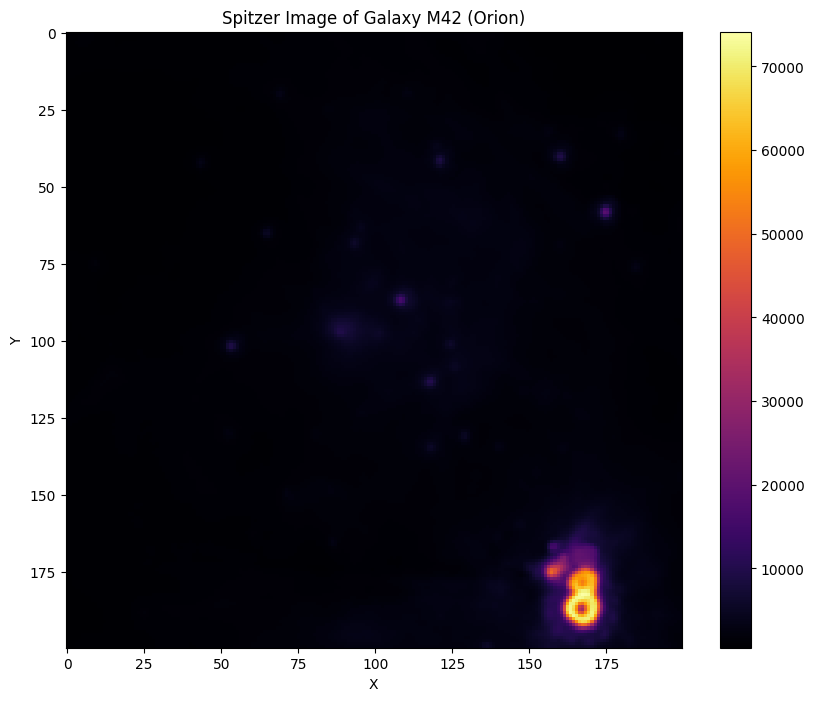

In [ ]:
# Simple image access queries from IRSA images from Spitzer telescope
coord = SkyCoord(ra=ra_hms, dec=dec_dms, unit=('hourangle', 'deg'), frame='icrs')
spitzer_images = Irsa.query_sia(pos=(coord, 1 * u.arcmin), collection='spitzer_seip').to_table()

# Open a cutout image for one of the science images
science_image = spitzer_images[spitzer_images['dataproduct_subtype'] == 'science'][30]
with fits.open(science_image['access_url'], use_fsspec=True) as hdul:
    cutout = Cutout2D(hdul[0].section, position=coord, size=2 * u.arcmin, wcs=WCS(hdul[0].header))

plt.figure(figsize=(10, 8))
plt.imshow(cutout.data, cmap='inferno')
plt.colorbar()
plt.title('Spitzer Image of Galaxy M42 (Orion)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
# How many science picture are therein spitzer_images?
science_images_count = len(spitzer_images[spitzer_images['dataproduct_subtype'] == 'science'])
print("Number of science images:", science_images_count)

Number of science images: 36




---



In [ ]:
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u
  is within their coverage
try:
# Define the coordinates of the Orion Nebula (or other object)
object_coords = coords.SkyCoord('05h35m17.3s -05d23m28s', unit=(u.hourangle, u.deg))

# Query SDSS to check if the object
    result_table = SDSS.query_region(object_coords, radius=2*u.arcmin)
    if result_table:
        print("Data is available for this region in SDSS.")
        print(result_table)
    else:
        print("No data found in SDSS for this region.")
except Exception as e:
    print(f"An error occurred: {e}")

IndentationError: unexpected indent (<ipython-input-6-b964abba0e11>, line 4)

output should be:

Data is available for this region in SDSS.
       ra               dec               objid        run  rerun camcol field
---------------- ----------------- ------------------- ---- ----- ------ -----
83.7907109763756 -5.39081167445895 1237667726440202290 5181   301      3   111
83.8035371583606 -5.38767591084729 1237667726440202265 5181   301      3   111
83.8040116483996 -5.38889713137506 1237667726440202272 5181   301      3   111
83.8037294896017 -5.39228525111305 1237667726440202281 5181   301      3   111
83.8051901532594 -5.39162255759063 1237667726440202262 5181   301      3   111
83.7987732549043 -5.38234490568713 1237667726440202274 5181   301      3   111
83.8020723774267 -5.38854357137709 1237667726440202267 5181   301      3   111
83.8026246830925 -5.38918641007318 1237667726440202270 5181   301      3   111
83.7973237216615 -5.38138899800032 1237667726440202294 5181   301      3   111
83.8241576011097 -5.38498435720738 1237671558084755519 6073   301      4    63
             ...               ...                 ...  ...   ...    ...   ...
83.8423236883501 -5.40372763502787 1237671558084821001 6073   301      4    64
83.8400945803699 -5.40903138520623 1237653751150018566 1927   301      4    58
83.8409931633383 -5.40936752554466 1237671558084821018 6073   301      4    64
 83.841385933677  -5.4043896629947 1237671558084821002 6073   301      4    64
83.8384578459195 -5.40648904032791 1237653751150018586 1927   301      4    58
83.8309588376545 -5.41483268739076 1237653751150018584 1927   301      4    58
83.8331776272601 -5.41453084220983 1237653751150018589 1927   301      4    58
83.8343963272851 -5.41473223157279 1237653751150018591 1927   301      4    58
83.8337334552397  -5.4147424396444 1237653751150018585 1927   301      4    58
83.8425627259097 -5.41692179626774 1237653751150018583 1927   301      4    58
Length = 133 rows

https://astroquery.readthedocs.io/en/latest/sdss/sdss.html

In [ ]:
# Reverse check to see to which object the coordinates belong
#coord = SkyCoord(ra=ra_hms, dec=dec_dms, unit=('hourangle', 'deg'), frame='icrs')
coord = SkyCoord('05h35m17.3s -05d23m28s', unit=(u.hourangle, u.deg), frame='icrs')
result = Simbad.query_region(coord, radius='0d0m5s')  # Search within a small radius (5 arcseconds)
if result:
    print(result['MAIN_ID'][0])  # Show the main name of the object
else:
    print("No object found in SIMBAD at these coordinates.")
object_name = 'MAIN_ID'

NAME Ori Region


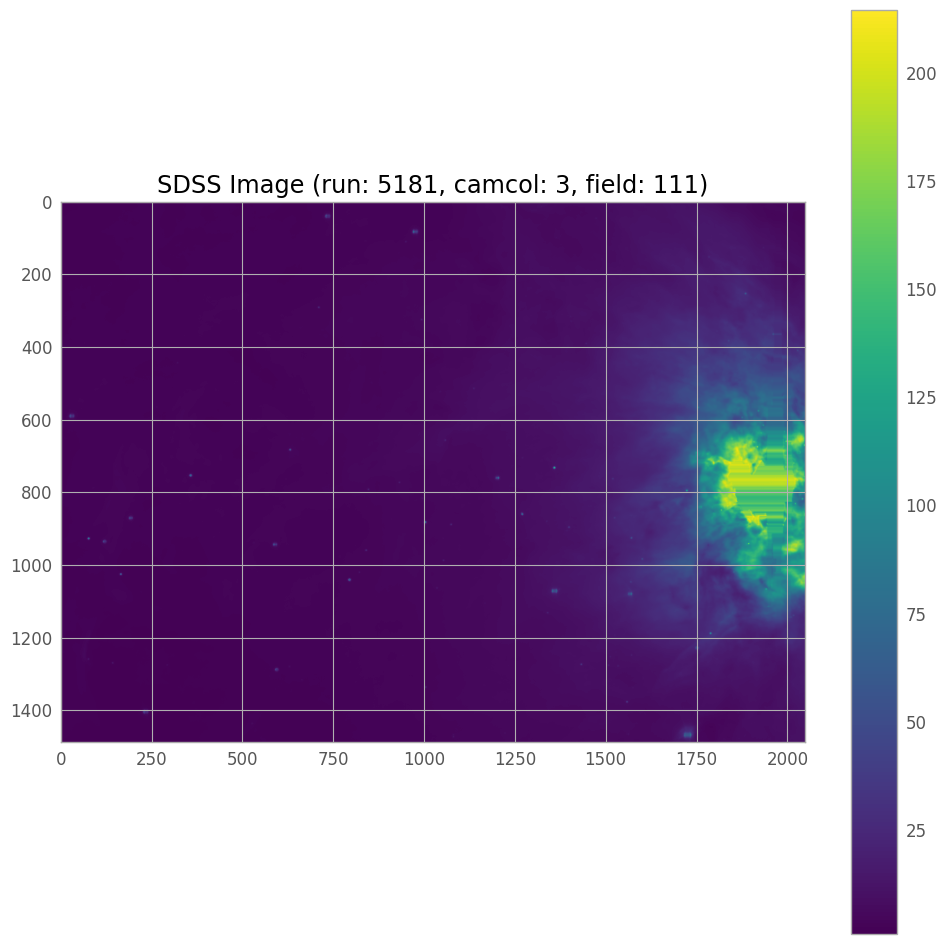

In [ ]:
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

# Define the SDSS parameters from the result table (example)
run = 5181
rerun = 301
camcol = 3
field = 111

# Query the image using the specific SDSS parameters
try:
    images = SDSS.get_images(run=run, rerun=rerun, camcol=camcol, field=field, band='g')

    # Display the first image result
    for image in images:
        plt.figure(figsize=(12, 12))
        plt.imshow(image[0].data, cmap='viridis')
        plt.colorbar()
        plt.title(f'SDSS Image (run: {run}, camcol: {camcol}, field: {field})')
        plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

* Right side (bright green area): This is likely a nebula or a dense region of gas and dust, which emits or reflects light prominently in the red spectrum. The bright color is due to higher pixel intensity in this region, indicating more light emission or reflection.
* Left side (darker regions): This area likely corresponds to the background sky or less dense regions. The faint, scattered dots might be stars or galaxies in the background.
* Overall structure: The image shows part of the Orion Nebula (or another object in that vicinity based on the coordinates you used), specifically the dense gas cloud structure emitting in the red filter.

Next Steps:
* You can adjust the filter band (e.g., 'r', 'g', 'i', 'z') to see how the object appears in different wavelengths.
* If you want more detailed information, you can overlay contours or perform image analysis using tools like astropy or photutils.

In [ ]:
from astropy.io import fits

# Load the FITS file
fits_file = 'https://raw.githubusercontent.com/deltorobarba/astrophysics/master/file_apStar-r5-2M05351021-0523215.fits'
hdulist = fits.open(fits_file)

# Check the structure of the FITS file
hdulist.info()

Filename: /root/.astropy/cache/download/url/db1c48113d1ada7359ded0e297378baa/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     105   ()      
  1                1 ImageHDU        12   (8575,)   float32   
  2                1 ImageHDU        12   (8575,)   float32   
  3                1 ImageHDU        12   (8575,)   int16   
  4                1 ImageHDU        12   (8575,)   float32   
  5                1 ImageHDU        12   (8575,)   float32   
  6                1 ImageHDU        12   (8575,)   float32   
  7                1 ImageHDU        12   (8575,)   float32   
  8                1 ImageHDU        29   (27,)   float64   
  9                1 BinTableHDU     75   1R x 29C   [30A, I, 4A, J, I, D, E, E, E, E, 2I, 2E, 2E, 2E, 2E, E, E, E, E, E, E, E, E, 401E, 401E, 401E, D, D, 401E]   


In [ ]:
header = hdulist[0].header
print(repr(header))

SIMPLE  =                    T /image conforms to FITS standard                 
BITPIX  =                   16 /bits per data value                             
NAXIS   =                    0 /number of axes                                  
EXTEND  =                    T /file may contain extensions                     
DATE    = '2014-08-09'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
OBJID   = '2M05351021-0523215' / Object ID                                      
J       =              11.3010 / 2MASS J magnitude                              
H       =              9.75500 / 2MASS H magnitude                              
K       =              8.96000 / 2MASS Ks magnitude                             
TARG1   =          -2147352576 / First APOGEE targeting flag (bitwise, see docs)
TARG2   =          -21474754